<h2>IMPORT LIBRARIES</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#2 load the dataset
df=pd.read_csv("c:\\users\\rahman\\downloads\\tourism_dataset.csv")

In [18]:
df.shape

(5989, 7)

In [4]:
#3 preview data
df.head(5)

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,Yes
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,No
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,Yes
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,Yes
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,No


In [5]:
df.tail(5)

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
5984,xAzwnVKAqz,USA,Urban,828137,1.97,132848.78,No
5985,IfKotyaJFC,France,Nature,276317,3.53,325183.96,Yes
5986,bPyubCWGgA,Egypt,Beach,809198,3.37,927336.50,No
5987,kkWIucpBnu,Egypt,Cultural,808303,2.52,115791.43,Yes
5988,gHXUrdticm,France,Cultural,40939,4.65,957026.85,Yes


In [6]:
df.sample(5)

,Location,Country,Category,Visitors,Rating,Revenue,Accommodation_Available
1008,hyVxjFyEAf,Australia,Urban,931672,2.89,2637.17,Yes
1894,FszYheXQVp,France,Cultural,777107,4.77,537224.41,No
3976,SjNOMRXhRC,India,Cultural,652478,1.62,201437.77,No
5590,rpciDMnmQv,Australia,Urban,614445,4.33,366277.11,No
3623,HSjEFopXKa,Brazil,Urban,11541,1.15,457805.58,Yes


In [7]:
#4 statistical summary
df.describe()

,Visitors,Rating,Revenue
count,5989.000000,5989.000000,5989.000000
mean,501016.089497,3.009347,499479.367253
std,289783.294978,1.155980,286743.225211
min,1108.000000,1.000000,1025.810000
25%,252789.000000,2.010000,251410.450000
50%,500831.000000,3.000000,494169.350000
75%,751371.000000,4.010000,742241.240000
max,999982.000000,5.000000,999999.490000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5989 entries, 0 to 5988
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Location                 5989 non-null   object 
 1   Country                  5989 non-null   object 
 2   Category                 5989 non-null   object 
 3   Visitors                 5989 non-null   int64  
 4   Rating                   5989 non-null   float64
 5   Revenue                  5989 non-null   float64
 6   Accommodation_Available  5989 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 327.7+ KB


<h2>Univariate Analysis</h2>
#plot distributions for numeric columns and countplots for categorical column

<function matplotlib.pyplot.show(close=None, block=None)>

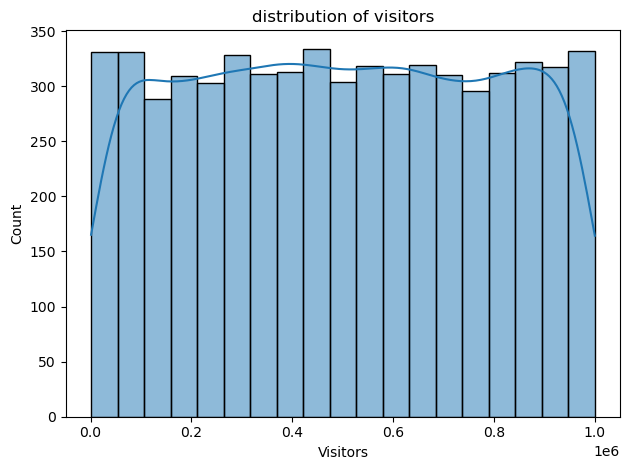

In [9]:
# Visitors distribution
plt.figure()
sns.histplot(df['Visitors'],kde=True)
plt.title('distribution of visitors')
plt.xlabel('Visitors')
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

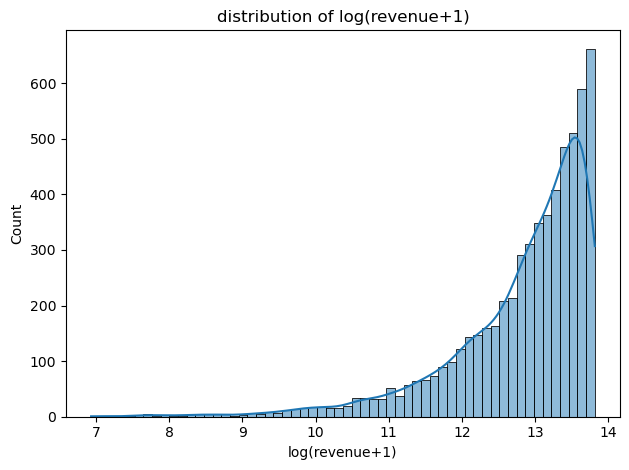

In [11]:
#revenue distribution 
plt.figure()
sns.histplot(np.log1p(df['Revenue']),kde=True)
plt.title('distribution of log(revenue+1)')
plt.xlabel('log(revenue+1)')
plt.tight_layout()
plt.show

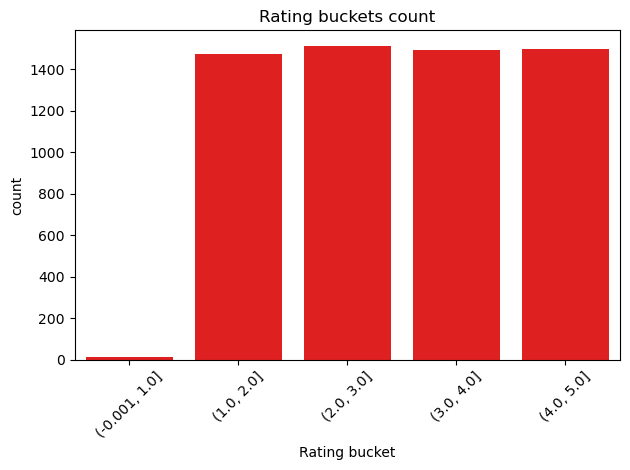

In [89]:
#rating distribution
plt.figure()
sns.countplot(x=pd.cut(df['Rating'],bins=[0,1,2,3,4,5],include_lowest=True),color='red')
plt.title('Rating buckets count')
plt.xlabel('Rating bucket')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

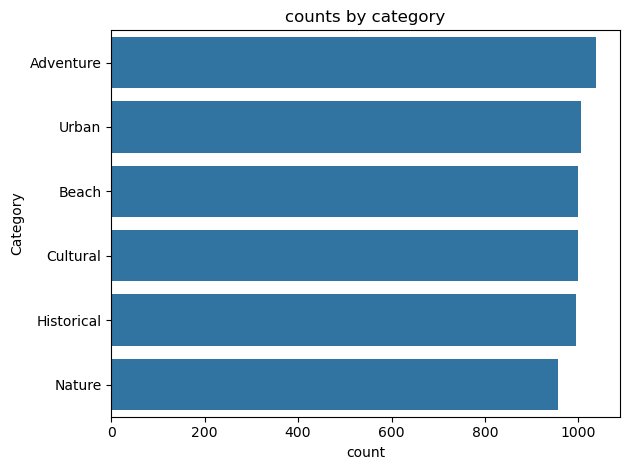

In [92]:
# categories count
plt.figure()
sns.countplot(y='Category',data=df,order=df['Category'].value_counts().index)
plt.title('counts by category')
plt.tight_layout()
plt.show

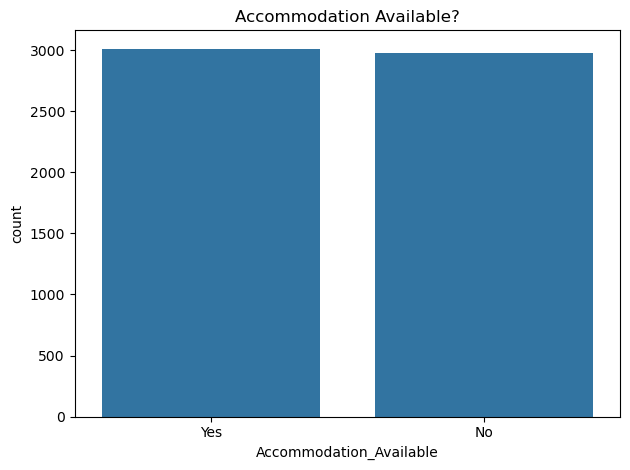

In [99]:
#Accommodation availability
plt.figure()
sns.countplot(x='Accommodation_Available',data=df)
plt.title('Accommodation Available?')
plt.tight_layout()
plt.show()

<h2>Bivariate Analysis</h2>
#realtionship between visitors,reve

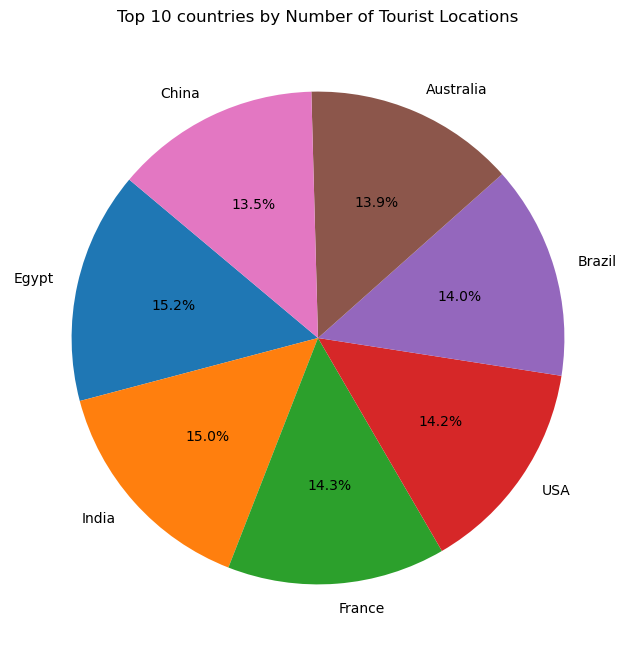

In [54]:
#PIE Chart - Top 10 countries by number of Locations
plt.figure(figsize=(8,8))
country_counts=df['Country'].value_counts().head(10)
plt.pie(country_counts,labels=country_counts.index,autopct='%1.1f%%',startangle=140)
plt.title('Top 10 countries by Number of Tourist Locations')
plt.show()

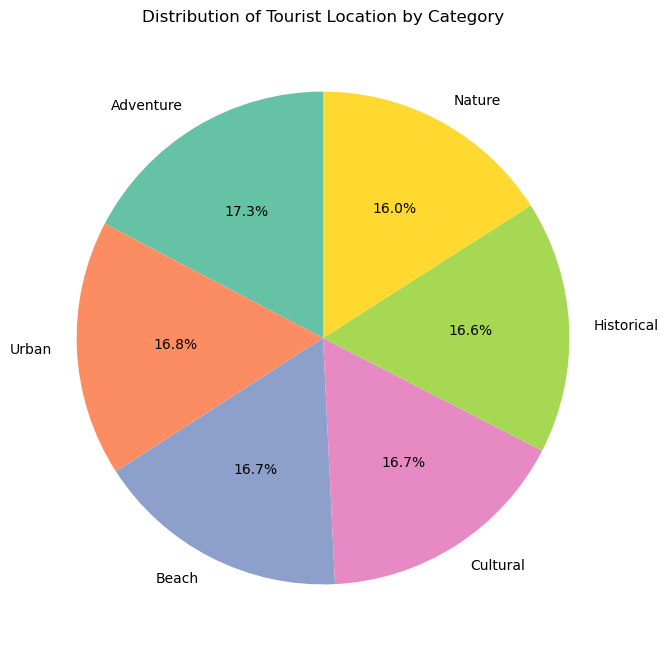

In [59]:
#pie chart - Distribution by Category
plt.figure(figsize=(8,8))
category_counts=df['Category'].value_counts()
plt.pie(category_counts,labels=category_counts.index, autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set2'))
plt.title('Distribution of Tourist Location by Category')
plt.show()

In [24]:
df.columns

Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')

In [25]:
df.columns = df.columns.str.strip()  # removes extra spaces

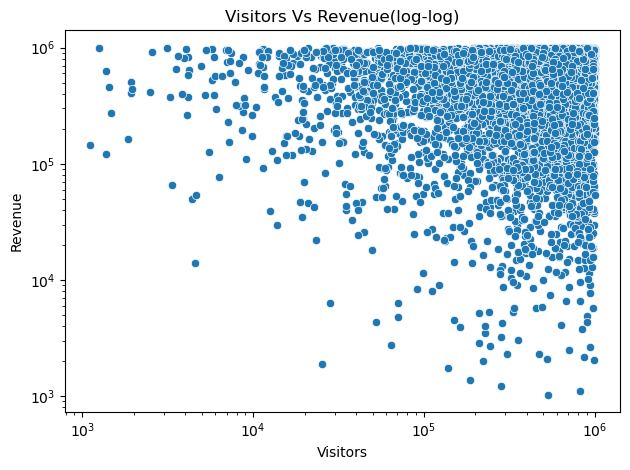

In [17]:
#Scatter visitors vs Revenue
plt.figure()
sns.scatterplot(x='Visitors',y='Revenue',data=df)
plt.xscale('log')
plt.yscale('log')
plt.title('Visitors Vs Revenue(log-log)')
plt.tight_layout()
plt.show()

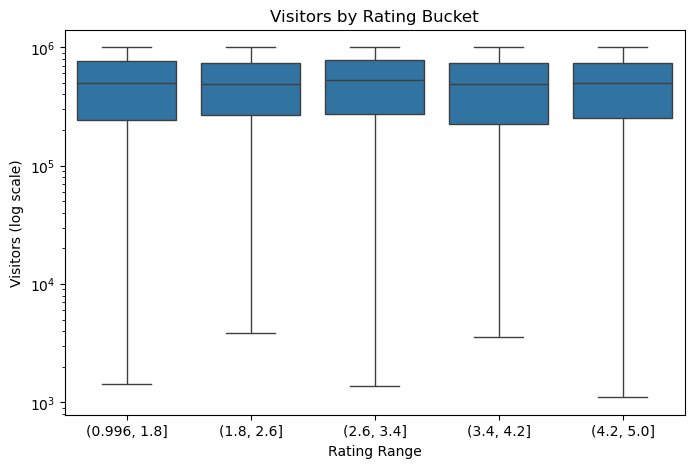

In [27]:
#Visitors vs Rating (boxplot by rating categories)
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x=pd.cut(df['Rating'], bins=5), y=df['Visitors'])
plt.yscale('log')
plt.title('Visitors by Rating Bucket')
plt.xlabel('Rating Range')
plt.ylabel('Visitors (log scale)')
plt.show()

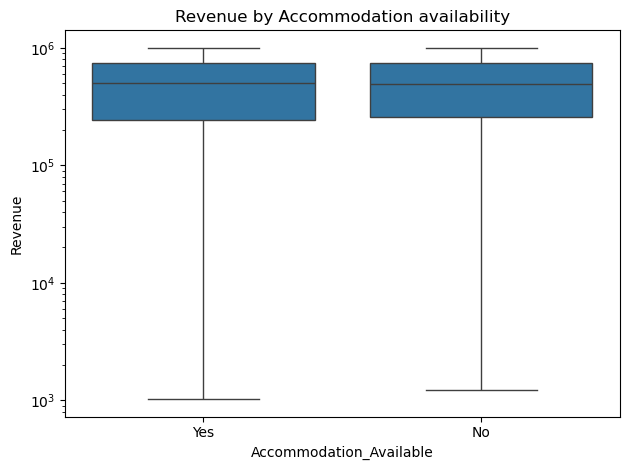

In [28]:
#Revenue by Accommodation
plt.figure()
sns.boxplot(x='Accommodation_Available',y='Revenue',data=df)
plt.yscale('log')
plt.title('Revenue by Accommodation availability')
plt.tight_layout()
plt.show()

<h2>CATEGORY & COUNTRY ANALYSIS</h2>

In [29]:
df.columns

Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')

In [35]:
#TOP 15 Locations by visitors
top_vis=df.nlargest(15,'Visitors')[['Location', 'Country', 'Category', 'Visitors','Revenue']]
print('\nTop 15 locations by visitors:')
print(top_vis.to_string(index=False))


Top 15 locations by visitors:
  Location   Country   Category  Visitors   Revenue
YWZBWoBIzj     China     Nature    999982 656615.31
rrZdbgEIqB     Egypt Historical    999891 462329.96
gcDnKZwQvb    France   Cultural    999855 157466.43
ObvfATdWXD Australia   Cultural    999750 184504.30
JHduvACsJw Australia   Cultural    999664 966022.60
fpDjltebSp       USA   Cultural    999197 843224.00
pXxOxFnLVA Australia Historical    998976 509279.84
vnyObMcbQY       USA     Nature    998356  53965.42
zIlbARMNtv    Brazil   Cultural    998327 203004.77
HnUcRjnqcx     India     Nature    997922 608390.07
NNgAygJrDL     India      Beach    997653 725540.38
gkMJCKgpFK     India  Adventure    997653 910116.59
SfPfkcmdyD       USA  Adventure    997568 425504.43
gaxmnedgWn     China   Cultural    997004 870945.66
PtOVsZCRQL     India Historical    996972 397432.05


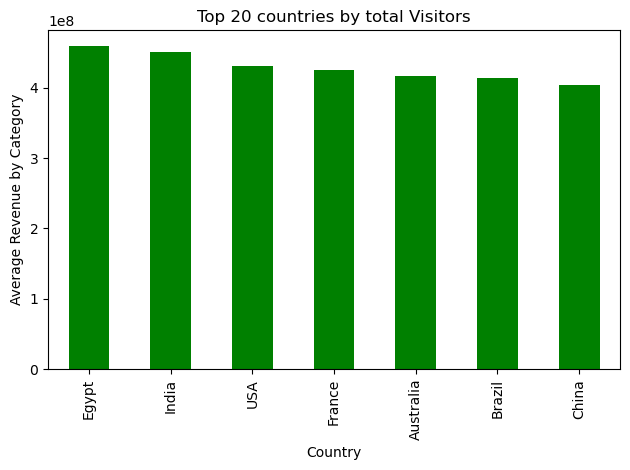

In [38]:
#Bar plot:Total visitors by country(Top 20)
country_vis=df.groupby('Country')['Visitors'].sum().sort_values(ascending=False).head(20)
plt.figure()
country_vis.plot(kind='bar',color='green')
plt.title('Top 20 countries by total Visitors')
plt.ylabel('Average Revenue by Category')
plt.tight_layout()
plt.show()

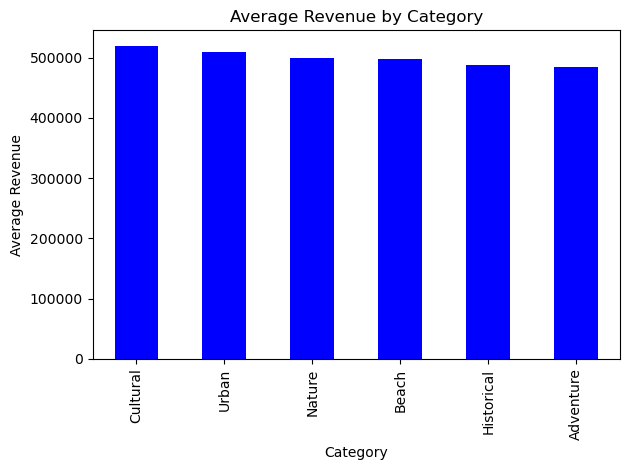

In [40]:
#Bar plot:Average revenue by category
cat_rev=df.groupby('Category')['Revenue'].mean().sort_values(ascending=False)
plt.figure()
cat_rev.plot(kind='bar',color='blue')
plt.title('Average Revenue by Category')
plt.ylabel('Average Revenue')
plt.tight_layout()
plt.show()

In [43]:
#Pivot table:Mean visitors and revenue by country and category(top countries only)
top_countries=country_vis.index.tolist()
pivot=df[df['Country'].isin(top_countries)].pivot_table(index='Country',columns='Category',values=['Visitors','Revenue'],aggfunc='mean')
print('\npivot table(mean) sample:')
print(pivot.round(2).head().to_string())



pivot table(mean) sample:
             Revenue                                                          Visitors                                                       
Category   Adventure      Beach   Cultural Historical     Nature      Urban  Adventure      Beach   Cultural Historical     Nature      Urban
Country                                                                                                                                      
Australia  494209.96  484690.92  481012.05  518756.73  506807.96  500050.53  508411.62  501275.79  496633.24  488589.68  501344.26  511112.84
Brazil     483336.39  469846.80  543163.15  496070.85  530883.62  532188.47  520005.38  495351.24  478189.59  489008.57  444383.28  520404.41
China      452053.21  509194.08  508660.81  492247.41  517056.04  487937.95  495185.01  493150.53  486046.16  486975.52  519888.70  531665.34
Egypt      502729.20  501646.43  509465.03  500068.73  498631.82  516988.95  500917.85  523317.41  488986.07  514547.61  

<h2>ADVANCED VISUALS-CORRELATION HEATMAP-PAIRPLOT</h2>

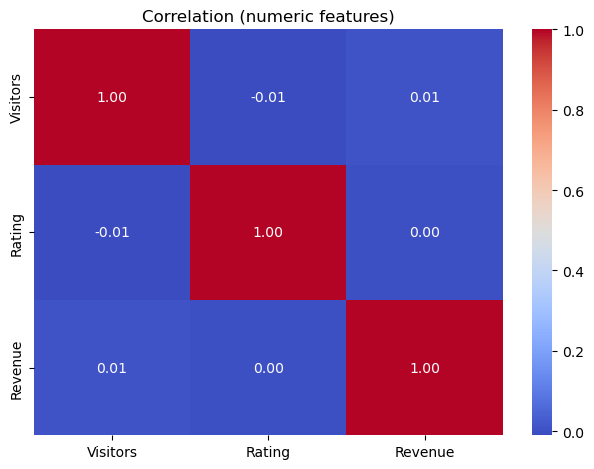

In [51]:
#CORRELATION
num_cols=df.select_dtypes(include=['int64','float64']).columns
corr=df[num_cols].corr()
plt.figure()
sns.heatmap(corr,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation (numeric features)')
plt.tight_layout()
plt.show()

In [48]:
df.columns

Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')

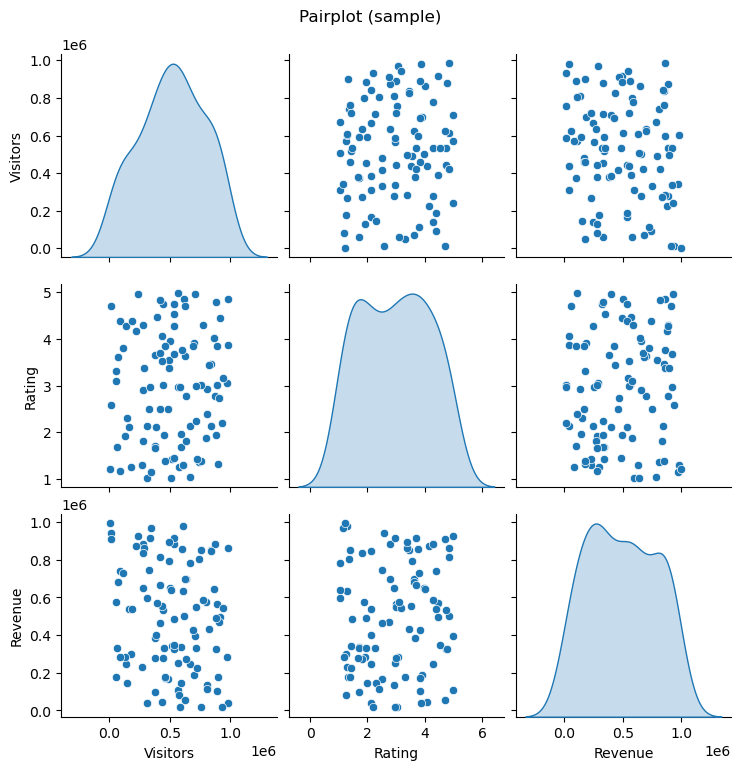

In [52]:
#pairplot-use a sample to keep plotting reasonable
sample=df.sample(n=100,random_state=42)
cols_for_pair=['Visitors', 'Rating', 'Revenue']
sns.pairplot(sample[cols_for_pair],diag_kind='kde')
plt.suptitle('Pairplot (sample)',y=1.02)
plt.show()

In [64]:
df.columns

Index(['Location', 'Country', 'Category', 'Visitors', 'Rating', 'Revenue',
       'Accommodation_Available'],
      dtype='object')

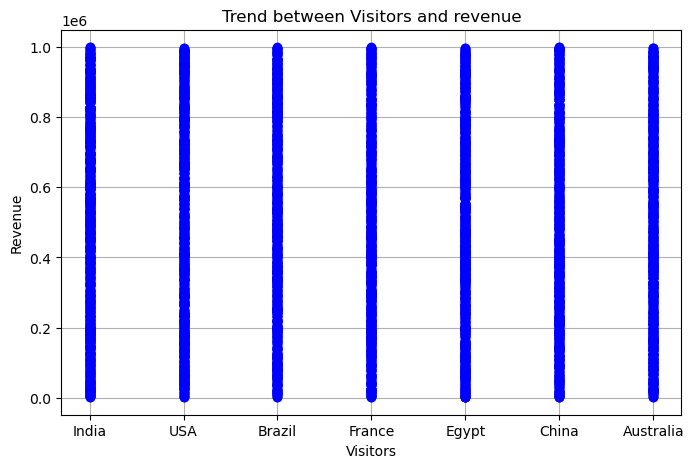

In [86]:
#Line plot-Visitors vs Revenue
plt.figure(figsize=(8,5))
plt.plot(df['Country'],df['Revenue'],marker='o',linestyle="",color='b')
plt.title('Trend between Visitors and revenue')
plt.xlabel('Visitors')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

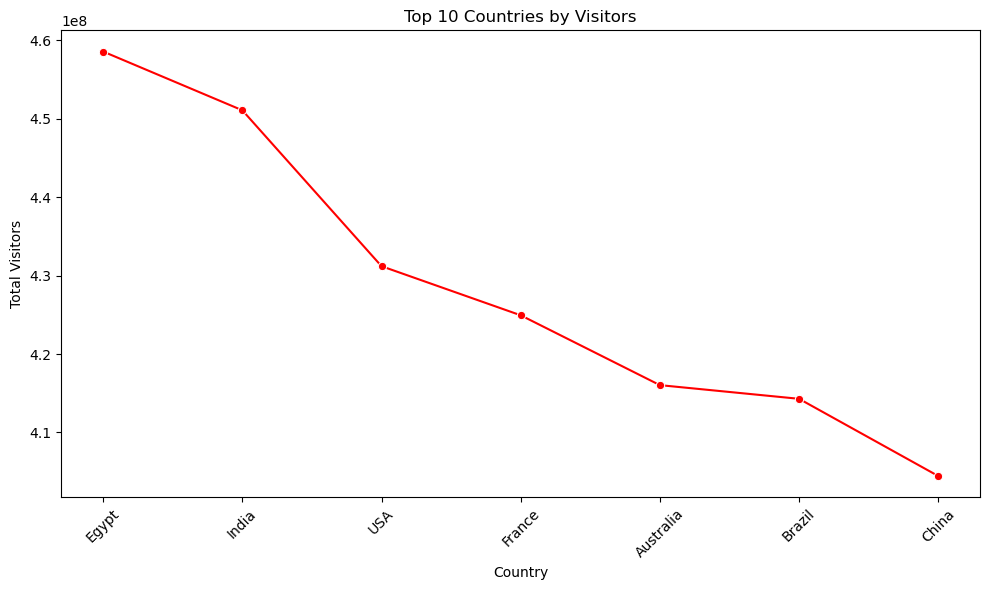

In [82]:

# LINE PLOT - Top 10 Countries by Visitors
top10 = df.groupby('Country', as_index=False)['Visitors'].sum().nlargest(10, 'Visitors')

plt.figure(figsize=(10,6))
sns.lineplot(data=top10, x='Country', y='Visitors', marker='o', color='teal')
plt.title('Top 10 Countries by Visitors')
plt.xlabel('Country')
plt.ylabel('Total Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


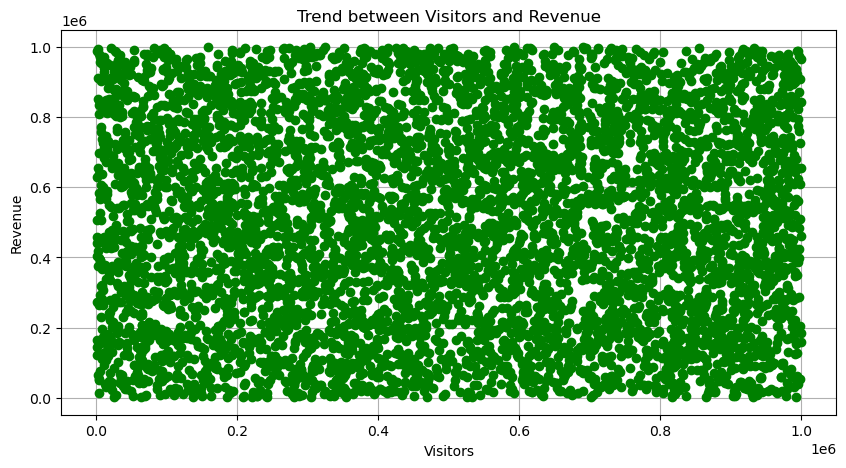

In [77]:
# LINE PLOT - Visitors vs Revenue
plt.figure(figsize=(10,5))
plt.plot(df['Visitors'], df['Revenue'], marker='o', linestyle='', color='g')
plt.title('Trend between Visitors and Revenue')
plt.xlabel('Visitors')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

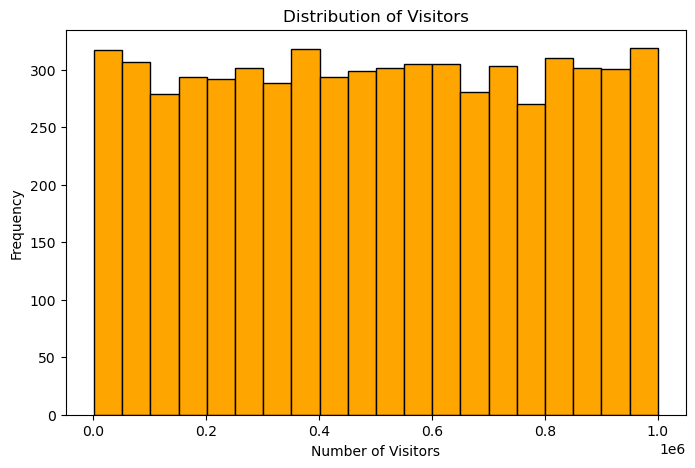

In [72]:
# HISTOGRAM - Distribution of Visitors
plt.figure(figsize=(8,5))
plt.hist(df['Visitors'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Visitors')
plt.xlabel('Number of Visitors')
plt.ylabel('Frequency')
plt.show()

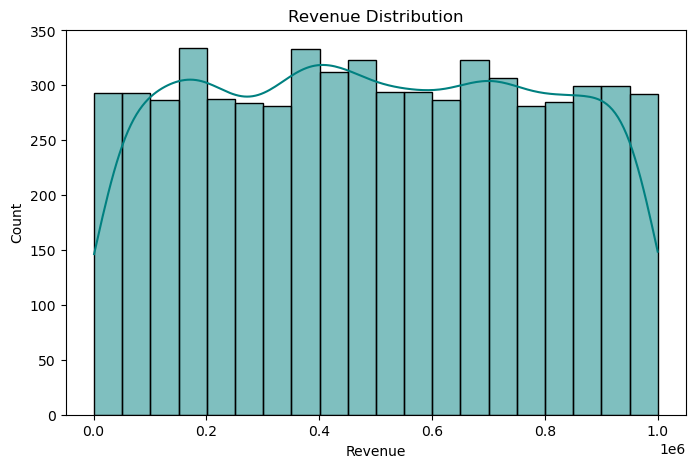

In [73]:
# HISTOGRAM with Seaborn
plt.figure(figsize=(8,5))
sns.histplot(df['Revenue'], bins=20, kde=True, color='teal')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')
plt.show()

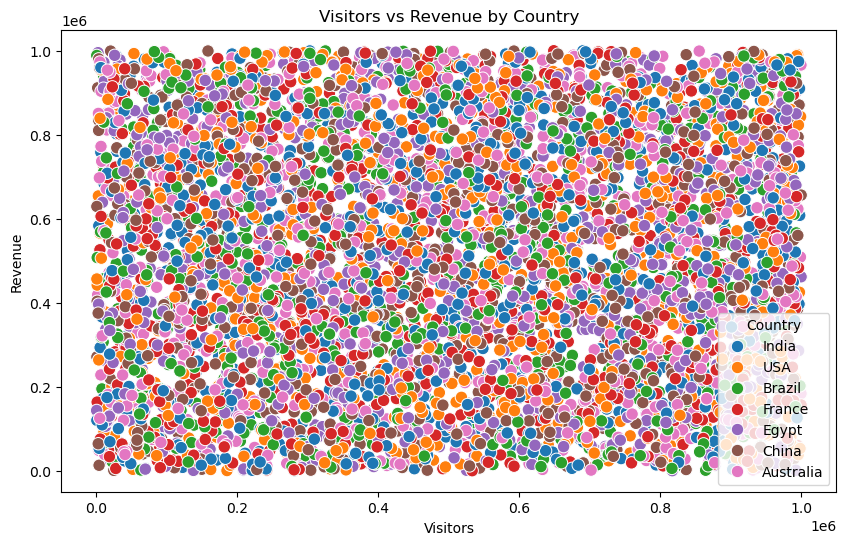

In [80]:
#scatter plot - Visitors vs Revenue 
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Visitors',y='Revenue',hue='Country',s=80)
plt.title('Visitors vs Revenue by Country')
plt.xlabel('Visitors')
plt.ylabel('Revenue')
plt.show()